
## We can also use python to make diagrams
* This uses matplotlib.patches

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans-serif" # note, could also use like "sans-serif" others, just google

# lets also import numpy
import numpy as np

# ----- ACTIVITY #1: Diagrams ------

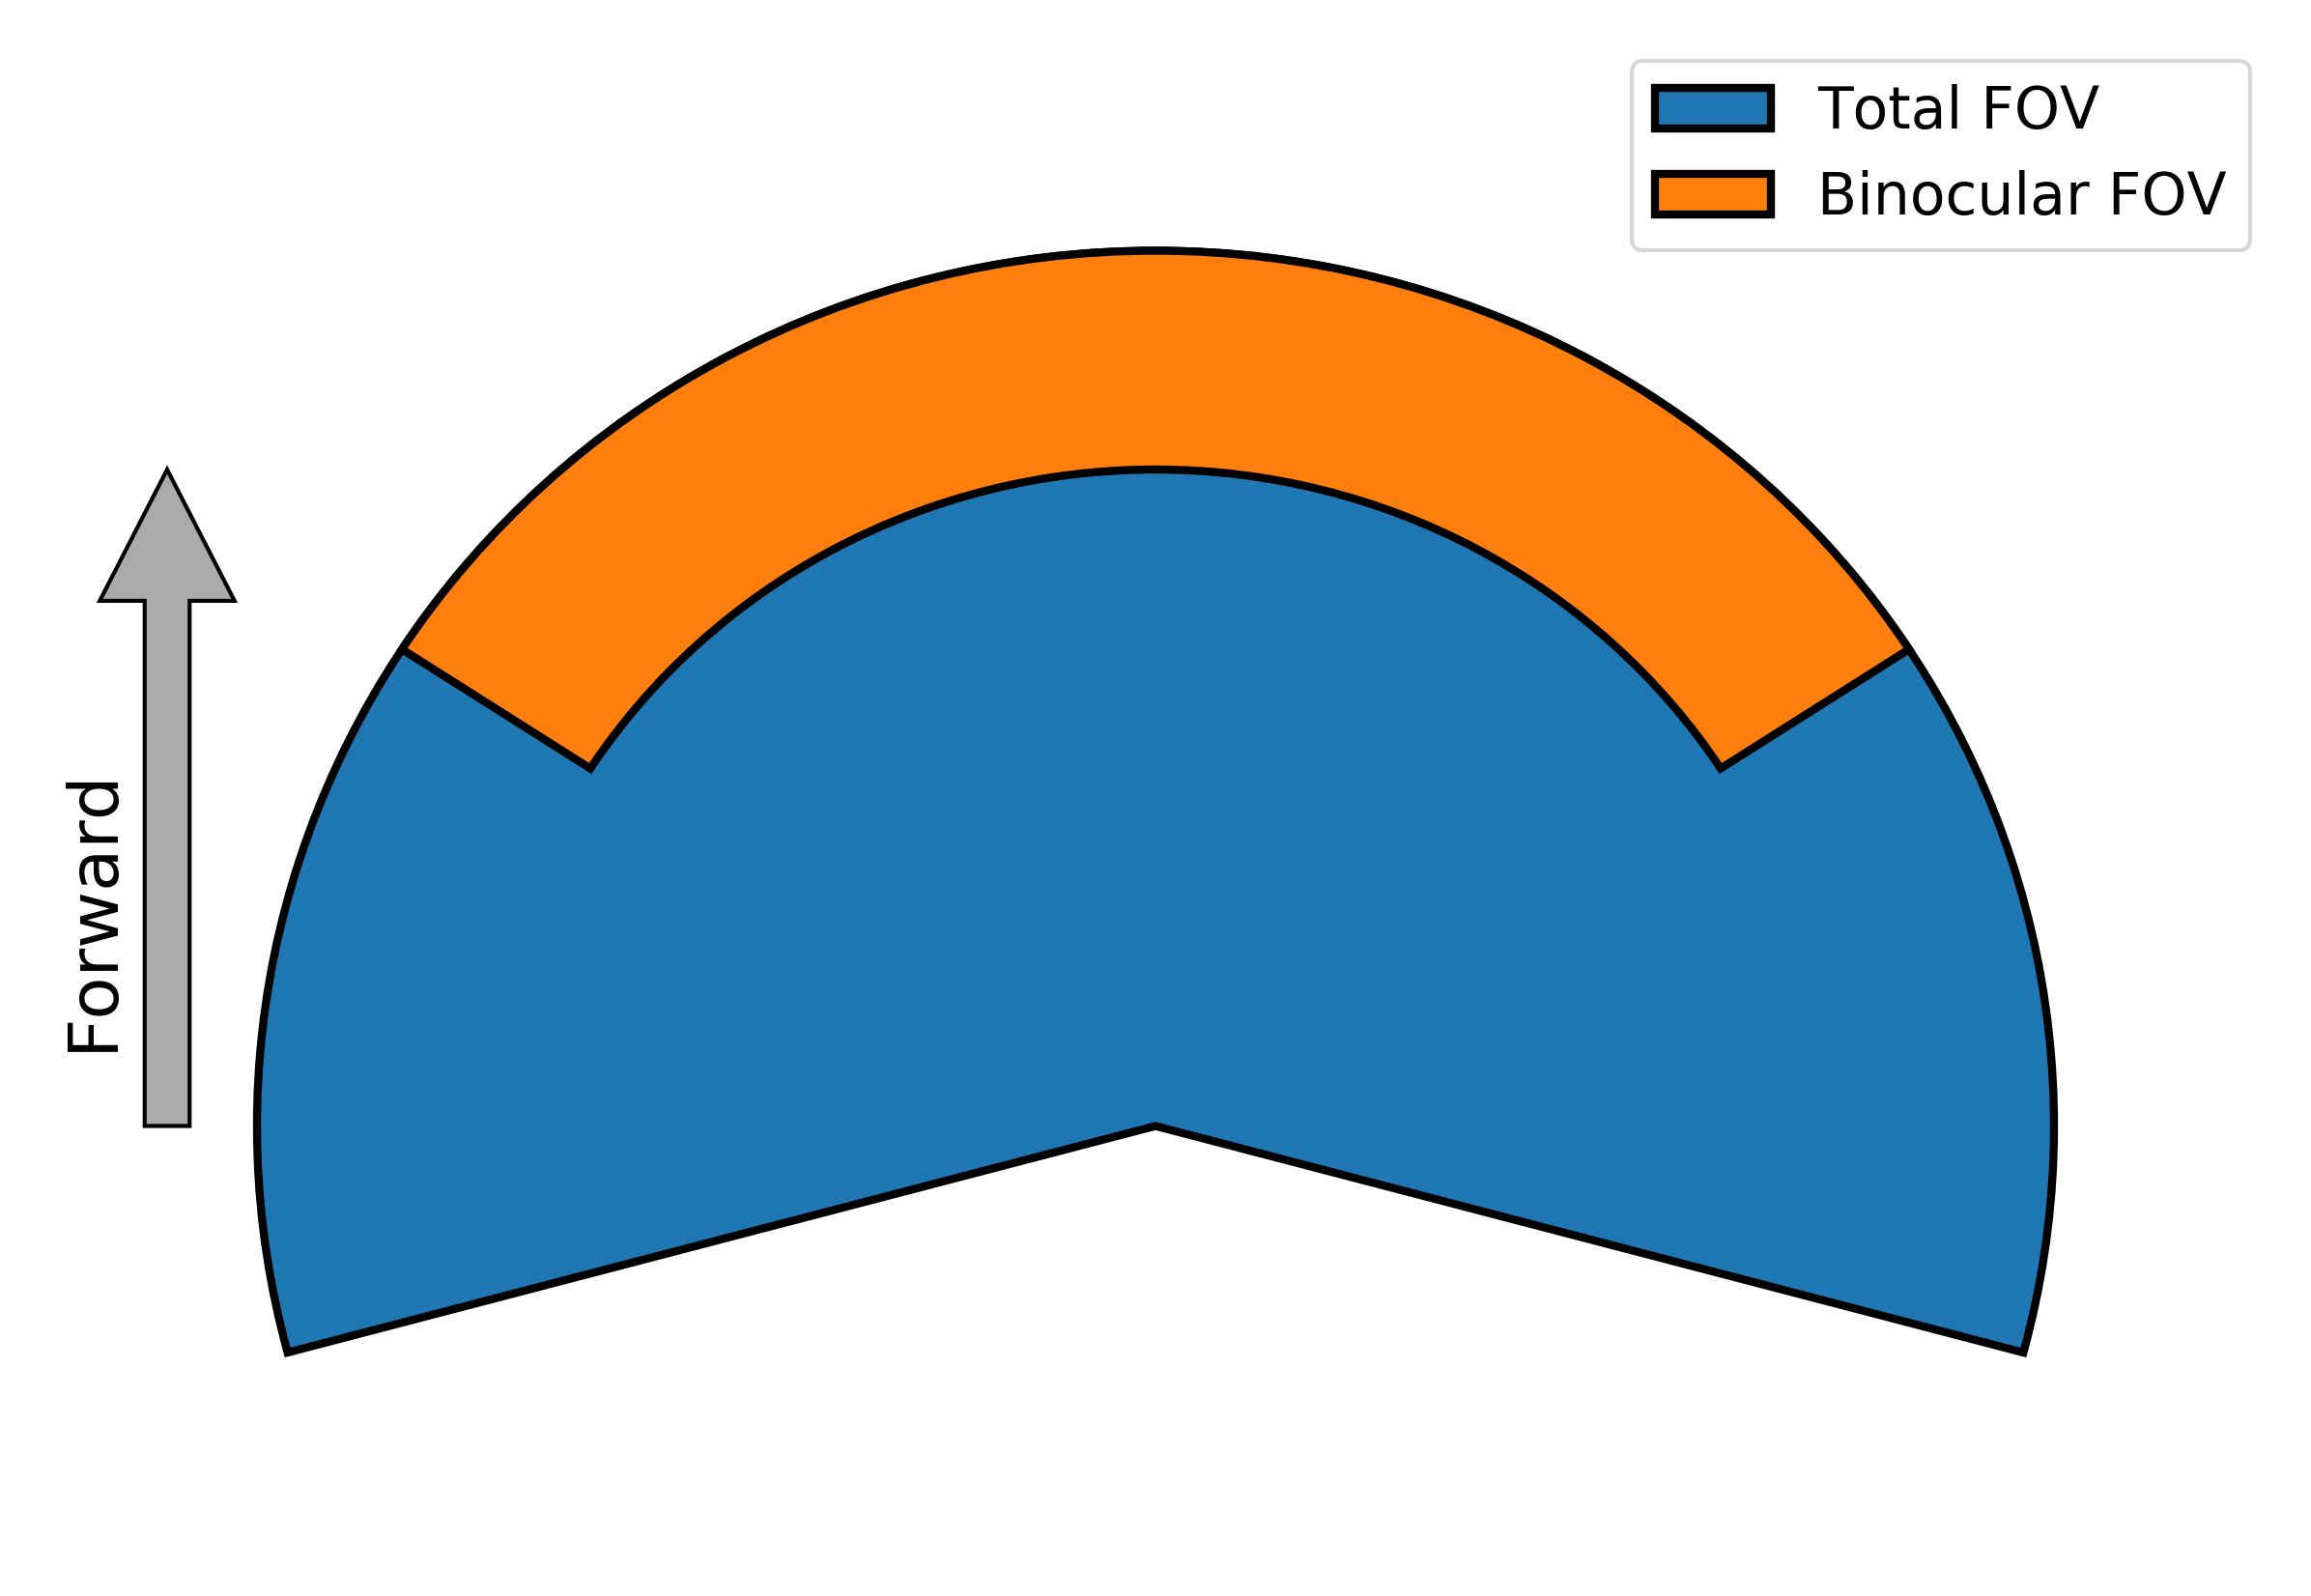

In [9]:
# lets re-do that diagram of the angular distribution of human vision we had in the slides from last lecture
# ***** GO TO LECTURE SLIDES FROM LAST TIME ****
# lets focus on the large FOV image

# make edge color for our patches black
edgecolor = "#000000" # black
# note, the above uses the standard hex codes for colors
#  we'll talk a bit about this later, but you can also just google "hex color codes", like so:
# https://www.color-hex.com/

# lets color our patches like what is in the slide
facecolor_totalFOV = "#1f77b4" # blueish
facecolor_bincFOV = "#ff7f0e" # orangish

# NOTE: do plt.show after each step!!

# (1)
totalFOV = matplotlib.patches.Wedge([0.0, 0.0], 1.0, 90 - (210/2.0), 90 + (210/2.0), # span of the wedge
                                    lw=2.0, 
                                    facecolor=facecolor_totalFOV, 
                                    edgecolor=edgecolor)

# (3) lets put this other wedge definition up here with the totalFOV one for consistency
binoc = matplotlib.patches.Wedge([0.0, 0.0], 1.0, 90 - (114/2.0), 90 + (114/2.0), 
                                 width=0.25, # so that it doesn't overlap totally with total FOV
                                 lw=2.0, 
                                 facecolor=facecolor_bincFOV, edgecolor=edgecolor)

# (5) Finally, if we remember back to the figure, there was an arrow dictating 
#     the forward direction
facecolor_arrow = "#aaaaaa" # gray
arrow = matplotlib.patches.Arrow(-1.10, 0.0, 0.0, 0.75, 
                                 width=0.25, edgecolor=edgecolor, 
                                 facecolor=facecolor_arrow)#, label="forward")


# (1)
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)
ax.add_patch(totalFOV)
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-0.5, 1.25)

# (3)
ax.add_patch(binoc)

# (5)
ax.add_patch(arrow)

# (6) Finally, lets overplot the arrow's notatoin
plt.text(-1.22, 0.35, "Forward", rotation=90, fontsize="xx-large")


# (4) lets also add a legend to remind us what is what
ax.legend([totalFOV, binoc], ["Total FOV", "Binocular FOV"], fontsize="x-large")


# (2) lets disappear the axis & ticks
ax.set_xticks([])
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

## Take away
* so, that was a lot of effort (maybe) to make a diagram, *but* we can now go back and change things very easily 
* for example we can change all the colors **do this**, or we can change the size of the wedge
* the take away is that Python not only makes graphs, but it can also be used to make diagrams

# ------ ACTIVITY #2: Manipulating Images -------

## Python can also be used to manipulate images
* lets try with our stitch image

In [10]:
# note: for this to work you might have to install pillow
#  either with pip: pip3 install pillow (might have to use sudo)
#  or anaconda: conda install -c anaconda pillow 
# Also, I think there is a way to do it using the GUI, but I've never used the Anaconda GUI to install things before
import PIL.Image as Image
#data = np.array(Image.open("https://uiuc-ischool-dataviz.github.io/spring2019online/week01/images/stitch_nobg_tilted.png", "r"))
im = Image.open("/Users/jillnaiman1/Downloads/stitch_reworked.png", "r")

data = np.array(im)

In [11]:
np.unique(data[:,:,0])
# so we see there are only 3 colors

array([  0, 126, 255], dtype=uint8)

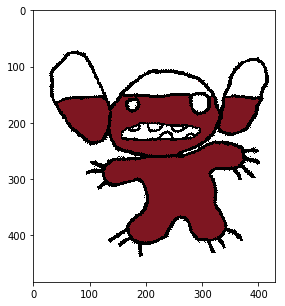

In [12]:
# lets remind ourselves a bit of what this looks like
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(im)

In [13]:
# if we recall last time, we talked a bit about how to use this visualization to
#  figure out how to quantify the goodness or badness of stitch, lets play with 
# this idea a bit more


# lets now use pixel filling to determine the volumetric good and bad levels
ngood = (data[:,:,0] == 255).sum() # number of "good" pixels
nbad = (data[:,:,0] == 126).sum() # number of "bad" pixels
total = ngood + nbad
badness = nbad / total
goodness = ngood/  total
print(badness, goodness)

# so, looks like ~77% bad and 23% good
# does that match up with what you'd think from looking at the above figure?

0.774405234691176 0.22559476530882408


(0.0, 2.0)

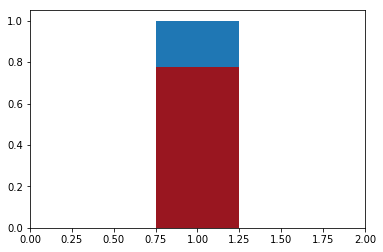

In [14]:
# now, lets plot this thing on a little bar graph!
p1 = plt.bar([1], badness, [0.5], color='#991620')
p2 = plt.bar([1], goodness, [0.5], bottom=badness)
plt.xlim(0.0, 2.0)

In [16]:
# what if we just counted pixes from our figure above?
# looks like good changes to badness at ~150
# image top is at ~50 pixels
# image bottom is at ~450 pixels

# so:
goodness_apparent = (50-150)/(50-450)

print(goodness_apparent)



0.25


In [17]:
# what is badness, apparent
1.0-goodness_apparent

0.75

([<matplotlib.patches.Wedge at 0x1173f3e80>,
 [Text(-0.8351102665775723, 0.7159544976161101, ''),
  Text(0.8351102665775721, -0.7159544976161102, '')])

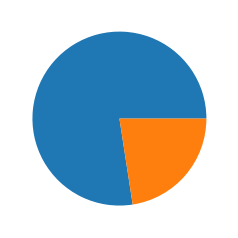

In [18]:
plt.pie([badness,goodness]) # can also do a pie chart if we want I suppose :D
# note: this uses wedges!!

# ------ ACTIVITY #3: Python tips and tricks! ------
(note: this will be put up as a "cheat sheet" for students if we are running short on time)

* We've been playing around with a few complex things in Python, but lets take a step back for a moment and delve into how Python deals with data in a bit more detail

In [19]:
# initialize a
a = []

In [20]:
# take a gander at a
a
# hey look a is an empty list!

[]

In [21]:
# we can mix types in our lists
a = [1, 2, "hey"]
# here we have a few integers and a string

In [22]:
# lets look at a again
a

[1, 2, 'hey']

In [23]:
# also, for our general purposes, we can call a string with a single or double quotes
'hey' == "hey"

True

In [24]:
# we can also easily add to our list with the append statement
a.append("there")
a

[1, 2, 'hey', 'there']

In [25]:
# returns an item at an index, & removes item, default is the last item
a.pop()

'there'

In [27]:
# now a is back to what we had before
a

[1, 2, 'hey']

In [9]:
# we can also grab elements of a by their indicies
a[1]

2

In [28]:
# note that indexing starts from 0 in python
a[0]

1

In [29]:
# the -# can be used to grab starting from the last element of the list
a[-1]

'hey'

In [30]:
# the colon means "all the things"
a[:]

[1, 2, 'hey']

In [31]:
# we can also take subsets easily, for example, ignorning the first element of a
# this is a way to filter data
a[1:]

[2, 'hey']

In [32]:
# can also take all but the last eleement
a[:-1]

[1, 2]

In [33]:
# we can also combine these two things to grab from the first to the 2nd to last element
# in this case, the one element
a[1:-1]

[2]

In [34]:
# there are also some nice string manipulations we can do
#  like splitting a string into a list object
a = "this is a much longer list, where i have taken a sentence and split it based on the spaces".split()

In [35]:
a

['this',
 'is',
 'a',
 'much',
 'longer',
 'list,',
 'where',
 'i',
 'have',
 'taken',
 'a',
 'sentence',
 'and',
 'split',
 'it',
 'based',
 'on',
 'the',
 'spaces']

In [36]:
# we can grab every other element in the list
a[::2]

['this', 'a', 'longer', 'where', 'have', 'a', 'and', 'it', 'on', 'spaces']

In [37]:
# we can also reorder this list back-to-front
a[::-1]

['spaces',
 'the',
 'on',
 'based',
 'it',
 'split',
 'and',
 'sentence',
 'a',
 'taken',
 'have',
 'i',
 'where',
 'list,',
 'longer',
 'much',
 'a',
 'is',
 'this']

In [38]:
# we can also update individual strings in this list
a[3] = 'sorta'

In [39]:
a

['this',
 'is',
 'a',
 'sorta',
 'longer',
 'list,',
 'where',
 'i',
 'have',
 'taken',
 'a',
 'sentence',
 'and',
 'split',
 'it',
 'based',
 'on',
 'the',
 'spaces']

In [42]:
# now lets look quickly at some funny things about strings in Python
name = "jill"

In [43]:
name[0]

'j'

In [44]:
# this will produce an error
name[0] = 'J'

TypeError: 'str' object does not support item assignment

In [46]:
# have to use something like replace
name.replace("j","J")

'Jill'

In [47]:
# python also has stuff called dictionaries
d = {'bevier': 'building', 'green' : 'road', 'champaign': 'city'}

In [48]:
d

{'bevier': 'building', 'green': 'road', 'champaign': 'city'}

In [49]:
# here the "champaign" entry is of type "city"
d['champaign']

'city'

In [51]:
# its super easy to add to dictionaries, here we add an empty list
d['mylist'] = []

In [52]:
d

{'bevier': 'building', 'green': 'road', 'champaign': 'city', 'mylist': []}

In [53]:
# we can add to this list in the usual way - with the above "append" function we used before
d['mylist'].append(10)

In [54]:
d

{'bevier': 'building', 'green': 'road', 'champaign': 'city', 'mylist': [10]}

In [55]:
# there are these other cool objects called "sets"
myset = set()

In [56]:
myset

set()

In [65]:
# lets check out some operations with sets, for example some movies I like
jill_movies = set(['last jedi', 'girls trip', 'frozen'])
# lets say we have another person named bob an these are the movies he likes
bob_movies = set(['last jedi', 'other movie'])

In [66]:
jill_movies

{'frozen', 'girls trip', 'last jedi'}

In [67]:
bob_movies

{'last jedi', 'other movie'}

In [69]:
# we can create a set that is made up of my movies, but without those movies that appear in bob's movies list
jill_movies - bob_movies

{'frozen', 'girls trip'}

In [70]:
jill_movies[0] # note we can't index

TypeError: 'set' object does not support indexing

In [71]:
# we can take the union of sets
jill_movies.union(bob_movies)

{'frozen', 'girls trip', 'last jedi', 'other movie'}

In [74]:
# for some final string manipulation, we can use a thing called enumerate 
# to both count in a for loop and use an element of our list directly
for i, word in enumerate(reversed(a)):
    print(i, word.upper())

0 SPACES
1 THE
2 ON
3 BASED
4 IT
5 SPLIT
6 AND
7 SENTENCE
8 A
9 TAKEN
10 HAVE
11 I
12 WHERE
13 LIST,
14 LONGER
15 SORTA
16 A
17 IS
18 THIS


In [75]:
# continue and break are flow control statements
for i, word in enumerate(sorted(a)):
    if word == "and":
        continue
    if word == "it":
        break
    print(i, word.upper())

0 A
1 A
3 BASED
4 HAVE
5 I
6 IS


In [72]:
# also, we can use the "?" to figure out things we don't know, for example the reader
#  function from  the csv library
import csv

In [73]:
csv.reader?

# ------ ACTIVITY #4: CSV Read and manipulate -----

* Ok, now lets check out some building inventory documents for Illinois
* Note: normally these would be on the jupyter hub, but again, we have to download them from the website!

In [79]:
# again,note we have to supply the full path
f = open("/Users/jillnaiman1/Downloads/building_inventory.csv")

In [80]:
# so here we are just going to read in our data.
# we can see its sort of in a weird format
f.seek(0)
for record in csv.reader(f):
    print(record)

['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3']
['Department of Natural Resources', 'Anderson Lake Conservation Area - Fulton County', 'Anderson Lake C.a.', 'Astoria', '61501', 'Fulton', '17', 'Cheri Bustos', '93', 'Hammond Norine K.', '47', 'Jil Tracy', 'In Use', '1975', '1975', '144', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'Anderson Lake Conservation Area - Fulton County', 'Anderson Lake C.a.', 'Astoria', '61501', 'Fulton', '17', 'Cheri Bustos', '93', 'Hammond Norine K.', '47', 'Jil Tracy', 'In Use', '2004', '2004', '144', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources'

['Department of Natural Resources', 'White Pines Forest State Park - Ogle County', '6712 West Pines Road', 'Mt Morris', '61054', 'Ogle', '16', 'Adam Kinzinger', '90', 'Demmer Tom', '45', 'Tim Bivins', 'In Use', '1932', '1932', '325', '1', '1', '0', 'Residential', 'Residential', 'Not provided']
['Department of Natural Resources', 'White Pines Forest State Park - Ogle County', '6712 West Pines Road', 'Mt Morris', '61054', 'Ogle', '16', 'Adam Kinzinger', '90', 'Demmer Tom', '45', 'Tim Bivins', 'In Use', '1932', '1932', '1674', '1', '1', '0', 'Residential', 'Residential', 'Not provided']
['Department of Natural Resources', 'White Pines Forest State Park - Ogle County', '6712 West Pines Road', 'Mt Morris', '61054', 'Ogle', '16', 'Adam Kinzinger', '90', 'Demmer Tom', '45', 'Tim Bivins', 'In Use', '1932', '1932', '1674', '1', '1', '0', 'Residential', 'Residential', 'Not provided']
['Department of Natural Resources', 'White Pines Forest State Park - Ogle County', '6712 West Pines Road', 'Mt Mo

['Historic Preservation Agency', 'Halfway Tavern - Marion County', 'Il Rte 50', 'Iuka', '62849', 'Marion', '0', '', '109', 'Reis David B.', '55', 'Dale A. Righter', 'In Use', '1840', '1840', '1604', '1', '1', '0', 'Assembly', 'Assembly', 'Not provided']
['Department of Natural Resources', 'Horseshoe Lake Conservation Area - Alexander Co.', 'Box 85', 'Miller City', '62962', 'Alexander', '12', 'Mike Bost', '118', 'Phelps Brandon W.', '59', 'Dale Fowler', 'In Use', '1920', '1920', '3950', '3', '2', '1', 'Residential', 'Residential', 'Not provided']
['Department of Natural Resources', 'Horseshoe Lake Conservation Area - Alexander Co.', 'Box 85', 'Miller City', '62962', 'Alexander', '12', 'Mike Bost', '118', 'Phelps Brandon W.', '59', 'Dale Fowler', 'In Use', '1910', '1910', '600', '1', '1', '0', 'Storage', 'Storage', 'Not provided']
['Department of Natural Resources', 'Horseshoe Lake Conservation Area - Alexander Co.', 'Box 85', 'Miller City', '62962', 'Alexander', '12', 'Mike Bost', '118'

['Department of Juvenile Justice', 'Illinois Youth Center - St. Charles', '38 West 060 Rte 38', 'St Charles', '60174', 'Kane', '14', 'Randy Hultgren', '50', 'Wheeler Keith R.', '25', 'Jim Oberweis', 'In Use', '1981', '1981', '5118', '1', '1', '0', 'Detention & Correc', 'Detention & Correc', 'Residential']
['Department of Juvenile Justice', 'Illinois Youth Center - St. Charles', '38 West 060 Rte 38', 'St Charles', '60174', 'Kane', '14', 'Randy Hultgren', '50', 'Wheeler Keith R.', '25', 'Jim Oberweis', 'In Use', '1981', '1981', '5118', '1', '1', '0', 'Detention & Correc', 'Detention & Correc', 'Residential']
['Department of Juvenile Justice', 'Illinois Youth Center - St. Charles', '38 West 060 Rte 38', 'St Charles', '60174', 'Kane', '14', 'Randy Hultgren', '50', 'Wheeler Keith R.', '25', 'Jim Oberweis', 'In Use', '1981', '1981', '17210', '1', '1', '0', 'Assembly', 'Assembly', 'Education']
['Department of Juvenile Justice', 'Illinois Youth Center - St. Charles', '38 West 060 Rte 38', 'St 

['Department of Military Affairs', 'Northwest Readiness Center - Chicago', '1551 North Kedzie Avenue', 'Chicago', '60651', 'Cook', '4', 'Luis Gutierrez', '4', 'Soto Cynthia', '2', 'Omar Aquino', 'In Use', '1940', '1940', '224959', '5', '4', '1', 'Assembly', 'Assembly', 'Industrial']
['Department of Military Affairs', 'General Jones Armory - Chicago', '5200 Cottage Grove', 'Chicago', '60615', 'Cook', '1', 'Bobby L. Rush', '26', 'Mitchell Christian L.', '13', 'Kwame Raoul', 'In Use', '1931', '1929', '299772', '6', '5', '1', 'Assembly', 'Assembly', 'Industrial']
['Department of Military Affairs', 'Donnelley Building - Chicago', '1910 South Calumet', 'Chicago', '60616', 'Cook', '7', 'Danny K. Davis', '5', 'Stratton Juliana', '3', 'Mattie Hunter', 'In Use', '1990', '1948', '144400', '3', '3', '0', 'Assembly', 'Assembly', 'Not provided']
['Department of Military Affairs', 'Midway Armory - Chicago', '5400 West 63rd Street', 'Chicago', '60638', 'Cook', '3', 'Daniel William Lipinski', '22', 'Ma

['Department of Transportation', 'Marion Maintenance Facility - Williamson County', 'Interstate 57 Milepost 46', 'Marion', '62959', 'Williamson', '12', 'Mike Bost', '117', 'Severin Dave', '59', 'Dale Fowler', 'In Progress', '2019', '2019', '760', '1', '0', '0', 'Business', 'Business', '']
['Department of Transportation', 'Marion Maintenance Facility - Williamson County', 'Intersate 57 Milepost 46', 'Marion', '62959', 'Williamson', '12', 'Mike Bost', '117', 'Severin Dave', '59', 'Dale Fowler', 'In Progress', '2019', '2019', '760', '1', '0', '0', 'Business', 'Business', '']
['Department of Transportation', 'Roscoe Maintenance Storage Facility', '9988 N. 2nd Street', 'Roscoe', '61073', 'Winnebago', '16', 'Adam Kinzinger', '69', 'Sosnowski Joe', '35', 'Dave Syverson', 'In Use', '0', '0', '1550', '1', '0', '0', 'Storage', '', '']
['Department of Transportation', 'Belvidere Maintenance Storage Facility - Boone County', '9797 Illinois Rte. 76', 'Belvidere', '61008', 'Boone', '16', 'Adam Kinzi

In [83]:
# lets fill up a dictonary with each column
# this is just saying, loop over each column
f.seek(0)
reader = csv.reader(f)
header = next(reader)
header


['Agency Name',
 'Location Name',
 'Address',
 'City',
 'Zip code',
 'County',
 'Congress Dist',
 'Congressional Full Name',
 'Rep Dist',
 'Rep Full Name',
 'Senate Dist',
 'Senator Full Name',
 'Bldg Status',
 'Year Acquired',
 'Year Constructed',
 'Square Footage',
 'Total Floors',
 'Floors Above Grade',
 'Floors Below Grade',
 'Usage Description',
 'Usage Description 2',
 'Usage Description 3']

In [85]:
data = {} # empty dictonary
for col in header:
    data[col] = []
data # now we have an empty dictonary with named entries ready to be filled

{'Agency Name': [],
 'Location Name': [],
 'Address': [],
 'City': [],
 'Zip code': [],
 'County': [],
 'Congress Dist': [],
 'Congressional Full Name': [],
 'Rep Dist': [],
 'Rep Full Name': [],
 'Senate Dist': [],
 'Senator Full Name': [],
 'Bldg Status': [],
 'Year Acquired': [],
 'Year Constructed': [],
 'Square Footage': [],
 'Total Floors': [],
 'Floors Above Grade': [],
 'Floors Below Grade': [],
 'Usage Description': [],
 'Usage Description 2': [],
 'Usage Description 3': []}

In [89]:
# to fill the dictionary we are going to use the function "zip"
# here is a little example
a = ["hi", "there", "my", "friends"]
b = [9, 4, 1, 9]
for word, num in zip(a, b):
    print(word, num, num2)
#  you can think of if kind of like "enumerate" that we 
# used above, but its iterating over 2 lists here instead of a number and a list


hi 9 9
there 4 9
my 1 9
friends 9 9


In [91]:
# ok, so we are going to use this function zip to fill our dictionary

# first, a call like before
f.seek(0)
reader = csv.reader(f)
header = next(reader)
data = {}
# fill column names as dictionary headings
for col in header:
    data[col] = []
    
# now, fill lists within headers
for row in reader:
    for col, val in zip(header, row):
        data[col].append(val)

In [92]:
len(data['Zip code'])

8862

In [93]:
len(data['Agency Name'])

8862

In [94]:
# we can also use keys() to list our dictionary names
data.keys()

dict_keys(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3'])

In [95]:
# we can do fun things with this dataset, like look at square footage of particular buildings
for i, location in enumerate(data['Address']):
    if '905 S Goodwin Ave' in location:
        print(data['Square Footage'][i])

154780


In [97]:
#####len(set(data['Agency Name']))

In [98]:
# we will import collections which is a library that provides other data structures
# in which to store our data
# its sort of like "numpy" for arrays in this sense
import collections

In [101]:
# for example, here we can create a counter for how many entries have particular agency names
collections.Counter(data['Agency Name'])
#data['Agency Name']

Counter({'Department of Natural Resources': 3223,
         'Department of Corrections': 1428,
         'Department of Human Services': 617,
         'Department of Transportation': 1137,
         'Department of State Police': 109,
         'Department of Military Affairs': 231,
         'Department of Agriculture': 228,
         'Governors State University': 11,
         'Department of Central Management Services': 60,
         'Illinois State University': 102,
         'Historic Preservation Agency': 284,
         'Department of Juvenile Justice': 120,
         'Southern Illinois University': 420,
         'Illinois Medical District Commission': 3,
         'University of Illinois': 525,
         "Department of Veterans' Affairs": 94,
         'Chicago State University': 16,
         'Northern Illinois University': 79,
         'Office of the Secretary of State': 41,
         'Illinois Emergency Management Agency': 2,
         'Western Illinois University': 42,
         'Eastern Illin

In [103]:
# lets pick out data particularly for UIUC
# first create an empty dictonary
uiuc = {}
# give it all the right headers
for col in header:
    uiuc[col] = []

uiuc

{'Agency Name': [],
 'Location Name': [],
 'Address': [],
 'City': [],
 'Zip code': [],
 'County': [],
 'Congress Dist': [],
 'Congressional Full Name': [],
 'Rep Dist': [],
 'Rep Full Name': [],
 'Senate Dist': [],
 'Senator Full Name': [],
 'Bldg Status': [],
 'Year Acquired': [],
 'Year Constructed': [],
 'Square Footage': [],
 'Total Floors': [],
 'Floors Above Grade': [],
 'Floors Below Grade': [],
 'Usage Description': [],
 'Usage Description 2': [],
 'Usage Description 3': []}

In [106]:
# fill this subset from data
for i, agency in enumerate(data['Agency Name']):
    if agency == 'University of Illinois Urbana-Champaign':
        for key in data:
            uiuc[key].append(data[key][i])
uiuc

{'Agency Name': ['University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'University of Illinois',
  'Un

In [107]:
collections.Counter(uiuc['Agency Name'])

Counter({'University of Illinois': 1050})

In [108]:
max(uiuc['Square Footage'])

'99092'

In [109]:
# note that the abofe is a string
type(uiuc['Square Footage'][0])

str

In [110]:
# this can present an issue if we want to compare otherwise numbers
'9' > '150000'

True

# --------- ACTIVITY #5: Using pandas to read and look at data -------

In [2]:
# we can also do a lot of these things iwth pandas library
# again, this is something you can pip or anaconda install if you need to
import pandas as pd

In [3]:
buildings = pd.read_csv('/Users/jillnaiman1/Downloads/building_inventory.csv')

In [4]:
buildings
# formatting here is sort of nice

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
5,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
7,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided
9,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided


In [5]:
# how many entries are there? as an iterable
buildings.index

RangeIndex(start=0, stop=8862, step=1)

In [14]:
buildings.loc[0:3] #easy to grab subsets - here by label
#buildings.loc? #easy to grab subsets - here by label
#buildings.columns

0    Anderson Lake C.a.
1    Anderson Lake C.a.
2    Anderson Lake C.a.
3    Anderson Lake C.a.
Name: Address, dtype: object

In [121]:
buildings.iloc[0:3] # look up by index, here the same as above, but note it treats data a bit differently

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


In [106]:
buildings.loc[0:10]["Agency Name"] # grab 1-10 entries, and print out the Agency names of those entries

0     Department of Natural Resources
1     Department of Natural Resources
2     Department of Natural Resources
3     Department of Natural Resources
4     Department of Natural Resources
5     Department of Natural Resources
6     Department of Natural Resources
7     Department of Natural Resources
8     Department of Natural Resources
9     Department of Natural Resources
10    Department of Natural Resources
Name: Agency Name, dtype: object

In [108]:
buildings["Agency Name"].nunique() # how many unique agencies

35

In [122]:
# if you are used to R at all, this is sort of like "summary" function, but basically giving some 
# summary statistics for the numerical data in our dataset
buildings.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8.862000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1913.267660,1906.135184,1.147603e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,337.024796,351.180642,3.817263e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1957.000000,1953.000000,2.330000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1975.000000,1974.000000,1.600000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1992.000000,1991.000000,6.426500e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


In [115]:
buildings.loc[buildings["Square Footage"] == 0] # we can subset easily - here, for buildings without any sq footage!

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
74,Department of Natural Resources,Rock Island Trail State Park - Stark County,"Rr #1, Box 64",Wyoming,61491,Stark,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1988,1988,0,1,1,0,Assembly,Assembly,Not provided
76,Department of Natural Resources,Rock Island Trail State Park - Stark County,"Rr #1, Box 64",Wyoming,61491,Stark,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1988,1988,0,1,1,0,Business,Business,Not provided
181,Department of Corrections,Vandalia Correctional Center - Fayette County,"P.o. Box 500, Rte. 51 N.",Vandalia,62471,Fayette,15,John Shimkus,107,Cavaletto John,...,In Use,2001,2001,0,1,1,0,Industrial,Industrial,Not provided
333,Department of Transportation,Gurnee - Lake County,3516 West Washington Street,Gurnee,60031,Lake,18,Darin M. LaHood,99,Wojcicki Jimene Sara,...,In Use,2001,2001,0,1,1,0,Storage,Storage,Not provided
421,Northern Illinois University,Northern Illinois University - DeKalb,Northern Illinois University,Dekalb,60115,DeKalb,16,Adam Kinzinger,70,Pritchard Robert W.,...,In Use,1999,1999,0,2,1,1,Education,Education,Not provided
422,Northern Illinois University,Northern Illinois University - DeKalb,1805 West Lincoln Hwy,Dekalb,60115,DeKalb,16,Adam Kinzinger,70,Pritchard Robert W.,...,In Use,1997,1920,0,4,3,1,Storage,Storage,Not provided
507,Department of Natural Resources,Chain O'Lakes CA and SP - McHenry County,39947 North State Park Road,Spring Grove,60081,McHenry,14,Randy Hultgren,64,Wheeler Barbara,...,In Use,2001,2001,0,1,1,0,Residential,Residential,Not provided
540,Department of Agriculture,DuQuoin State Fairgrounds - Perry County,"Route #2, Box 306",Duquoin,62832,Perry,12,Mike Bost,115,Bryant Terri,...,In Use,1988,1988,0,1,1,0,Storage,Storage,Not provided
551,Department of Natural Resources,Nauvoo State Park - Hancock County,So Sidney,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,0,0,1,1,0,Storage,Storage,Not provided
552,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,0,0,1,1,0,Residential,Residential,Not provided


In [116]:
buildings["Bldg Status"].unique() 

array(['In Use', 'Abandon', 'In Progress'], dtype=object)

In [123]:
buildings.loc[buildings["Bldg Status"] == "In Progress"] # who is being built now?

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
772,Department of Veterans' Affairs,Quincy Veterans' Home - Adams County,1707 North 12th Street,Quincy,62301,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2010,2010,5200,1,1,0,Storage,Storage,Not provided
792,Chicago State University,Chicago State University - Cook County,95th & King Dirve,Chicago,60628,Cook,1,Bobby L. Rush,34,"Sims, Jr. Elgie R.",...,In Progress,2010,2010,30000,2,2,0,Education,Education,Not provided
796,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
797,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
798,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
1098,Chicago State University,Chicago State University - Cook County,95th & King Dirve,Chicago,60628,Cook,1,Bobby L. Rush,34,"Sims, Jr. Elgie R.",...,In Progress,2010,2010,37000,3,2,1,Business,Business,Not provided
1135,University of Illinois,University of Illinois/University Center - Chi...,1100 South Halsted Street,Chicago,60607,Cook,2,Robin Kelly,80,DeLuca Anthony,...,In Progress,2008,2008,144580,7,6,1,Education,Education,Not provided
6590,Department of Transportation,Northside Garage - Harlem/Irving Team Section,4051 North Harlem Ave,Chicago,60634,Cook,5,Mike Quigley,19,Martwick Robert,...,In Progress,2009,2009,24929,2,2,0,Business,Industrial,Not provided
6903,Department of Military Affairs,Armed Forces Reserve Center - Mt. Vernon,600 Shiloh Drive,Mt Vernon,62864,Jefferson,12,Mike Bost,115,Bryant Terri,...,In Progress,2010,2010,10944,1,1,0,Industrial,Storage,Not provided
8315,Department of State Police,Belleville State Police Forensic Laboratory,2220 West Main Street,Belleville,62226,St. Clair,12,Mike Bost,113,Hoffman Jay,...,In Progress,2011,2011,64000,3,2,1,Business,Unusual,Not provided


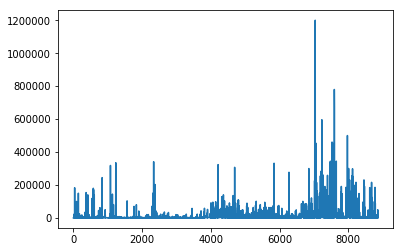

In [125]:
buildings["Square Footage"].plot() # easy plots with pandas dataframes

In [126]:
# again, another way to sort
for status, df in buildings.groupby("Bldg Status"):
    print(status, df.shape[0])

Abandon 226
In Progress 113
In Use 8523


In [127]:
buildings.max()

Agency Name                   Western Illinois University
Location Name         Zimmerman Property - LaSalle County
City                                                 Zion
Zip code                                            68297
Congress Dist                                          18
Rep Dist                                              119
Senate Dist                                            60
Bldg Status                                        In Use
Year Acquired                                        2019
Year Constructed                                     2019
Square Footage                                    1200000
Total Floors                                           31
Floors Above Grade                                     30
Floors Below Grade                                      4
Usage Description                    Utiility & Miscellan
dtype: object

In [128]:
pd.read_csv?

In [130]:
b = pd.read_csv("/Users/jillnaiman1/Downloads/building_inventory.csv",
           na_values = {'Square Footage': 0,
                       'Year Acquired': 0,
                       'Year Constructed': 0}) 
# specify what to do with incomplete entries, here this just says if any of these columns have a value 0, treat
#  as a NaN or not-a-number

In [131]:
b["Square Footage"].min()

9.0

In [132]:
b["Year Constructed"].min()

1753.0

In [133]:
b["Year Acquired"].min()

1753.0

In [134]:
b.loc[b["Year Acquired"] < 1800]

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
2796,Historic Preservation Agency,Fort De Chartres Historic Site - Prairie Du Ro...,1350 State Hwy 155,Prairie Du Rocher,62241,Randolph,12,Mike Bost,116,"Costello, II Jerry",...,In Use,1753.0,1753.0,1200.0,1,1,0,Assembly,Assembly,Not provided


In [135]:
b2 = b.sort_values("Year Constructed")

In [136]:
b2.iloc[0]

Agency Name                                     Historic Preservation Agency
Location Name              Fort De Chartres Historic Site - Prairie Du Ro...
Address                                                   1350 State Hwy 155
City                                                       Prairie Du Rocher
Zip code                                                               62241
County                                                              Randolph
Congress Dist                                                             12
Congressional Full Name                                            Mike Bost
Rep Dist                                                                 116
Rep Full Name                                             Costello, II Jerry
Senate Dist                                                               58
Senator Full Name                                               Paul Schimpf
Bldg Status                                                           In Use

In [137]:
b.sort_values("Year Constructed", inplace=True)

In [152]:
b.groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
1753.0       1200.0
1802.0       4440.0
1810.0       4033.0
1832.0     120000.0
1837.0      10302.0
1838.0       2010.0
1839.0      11752.0
1840.0      36918.0
1841.0       3256.0
1843.0        900.0
1844.0       4088.0
1845.0      65846.0
1848.0      21292.0
1850.0       2267.0
1853.0     255000.0
1854.0       2140.0
1855.0      66154.0
1856.0        750.0
1857.0      18124.0
1858.0      22367.0
1859.0       4847.0
1860.0      27417.0
1863.0      15795.0
1865.0     223494.0
1867.0       2700.0
1870.0       2864.0
1871.0       6403.0
1872.0      14900.0
1873.0      11000.0
1874.0       6600.0
            ...    
1990.0    2209048.0
1991.0    1653847.0
1992.0     900610.0
1993.0     351998.0
1994.0     435657.0
1995.0     877396.0
1996.0    1351591.0
1997.0    1110664.0
1998.0     731394.0
1999.0     364417.0
2000.0    1248787.0
2001.0    1329954.0
2002.0    1036110.0
2003.0    1041629.0
2004.0     575251.0
2005.0    1494411.0
2006.0     621710.0
2007.0     995526.0
2008.0

In [153]:
b.loc[b["Agency Name"] == "University of Illinois"].groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
1857.0       3000.0
1870.0       2864.0
1878.0      33071.0
1888.0      28746.0
1890.0      27409.0
1896.0     179561.0
1899.0      32229.0
1900.0     109056.0
1902.0     268116.0
1904.0      17504.0
1905.0     276546.0
1907.0      47656.0
1908.0     149427.0
1909.0     142281.0
1910.0     112677.0
1911.0     166902.0
1912.0      83627.0
1913.0      51609.0
1914.0     334106.0
1915.0     156802.0
1916.0      82951.0
1917.0       4896.0
1918.0      19983.0
1919.0      12035.0
1920.0     192338.0
1921.0      65876.0
1922.0      55764.0
1923.0     108780.0
1924.0      52481.0
1925.0     449306.0
            ...    
1977.0     706442.0
1978.0      34406.0
1979.0      30788.0
1980.0     216717.0
1981.0     289336.0
1982.0     299198.0
1983.0     147287.0
1984.0      28378.0
1985.0      22862.0
1986.0     182754.0
1987.0     494810.0
1988.0     122374.0
1989.0     149163.0
1990.0     296709.0
1991.0    1247703.0
1992.0      80094.0
1993.0      14976.0
1995.0      15118.0
1996.0